# Random Forest Regression

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!wget -O Data.csv "https://drive.google.com/file/d/1GtWRaPAfH_kDXqU8OGDWXMSRsIFbGDHy/view"
#!ls

#file_path = '/content/drive/MyDrive/Data.csv'
#try:
#  dataset = pd.read_csv(file_path)
#  X = dataset.iloc[:, :-1].values
#  y = dataset.iloc[:, -1].values

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(y_train)

[[  11.22   43.13 1017.24   80.9 ]
 [  13.67   54.3  1015.92   75.42]
 [  32.84   77.95 1014.68   45.8 ]
 ...
 [  16.81   38.52 1018.26   75.21]
 [  12.8    41.16 1022.43   86.19]
 [  32.32   67.9  1006.08   37.93]]
[473.93 467.87 431.97 ... 459.01 462.72 428.12]


## Training the Random Forest Regression model by iterating hyperparameters (Max_Depth & N_Trees)

In [27]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score
#for i in range(10, 16):
#  n_tree_model = []
#  max_d = []
#  r2_scores = []
#  for j in range(1, 41):
#    regressor = RandomForestRegressor(n_estimators = j, max_depth = i, random_state = 0)
#    regressor.fit(X_train, y_train)
#    y_pred_ts = regressor.predict(X_test)
#    np.set_printoptions(precision=5)#
#    r_score_ts = []
#    r_score_ts.append(r2_score(y_test, y_pred_ts))
#    vertical_r_score_ts = np.reshape(r_score_ts, (-1, 1))
#    if len(vertical_r_score_ts) >= j-2 and r2_score(y_test, y_pred_ts) > r_score_ts[j-2]:
#      n_tree_model[i-10] = j
#      max_d[i-10] = i
#      r2_scores[i-10] = r2_score(y_test, y_pred_ts)
#result = np.column_stack((np.arange(len(r2_scores)).reshape(-1, 1), n_tree_model, max_d, r2_scores))
#x_values_MD = result[:, 0]

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

n_tree_model = [0] * 40
max_d = [0] * 40
r2_scores = [0] * 40

for i in range(10, 16):
    for j in range(1, 41):
        regressor = RandomForestRegressor(n_estimators=j, max_depth=i, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred_ts = regressor.predict(X_test)
        r_score_ts = r2_score(y_test, y_pred_ts)
        r2_scores_ts = []
        r2_scores_ts.append(r_score_ts)
        if j > 1 and r_scores_ts[j-1] > r2_scores_ts[j-2]:
            n_tree_model[j-2] = j
            max_d[j-2] = i
            r2_scores[j-2] = r_score_ts

result = np.column_stack((np.arange(len(n_tree_model)).reshape(-1, 1), n_tree_model, max_d, r2_scores))


NameError: ignored

In [ ]:
print(result)

## RFR Model Performance for Training set & Test set

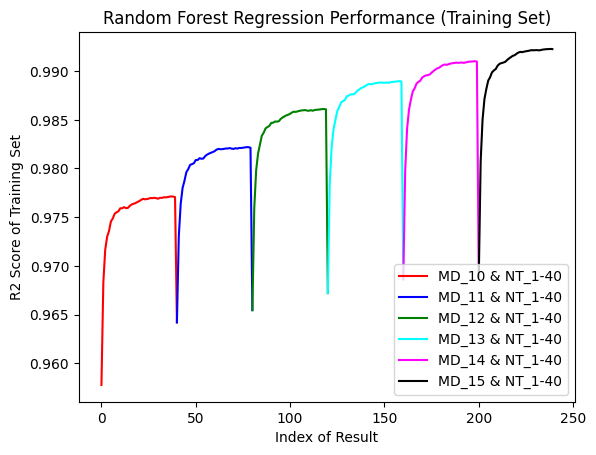

The maximum R2_Score is 0.9922822032682256with an Index from Result (array) as: 


In [ ]:
plt.scatter(result[:, 0], result[:, 3], c = 'red', label = 'NT_1-40')
plt.plot(result[:, 0], result[:, 3], c = 'blue', label = 'MD 10-15')
plt.plot(result[:, 0], result[:, 3], c = 'blue', label = 'MD 10-15')
plt.xlabel('Index of Result')
plt.ylabel('R2 Score')
plt.title('Random Forest Regression Performance')
plt.legend()
plt.show()
max_rscore_tr = np.max(r2_scores_tr)
np.set_printoptions(precision=5)
print('The maximum R2_Score is ' + str(max_rscore_tr) + 'with an Index from Result (array) as: ')

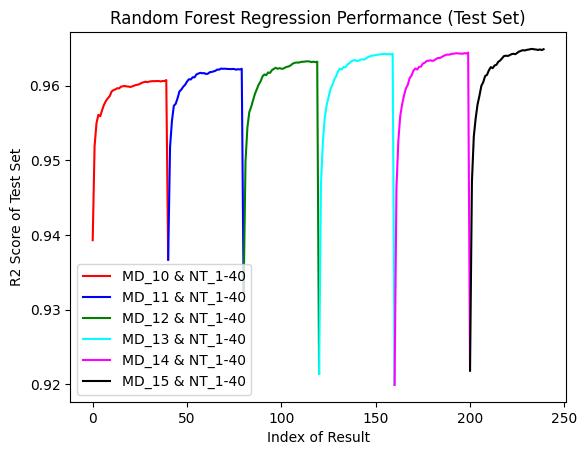

The maximum R2_Score is 0.9649302972114636with an Index from Result (array) as: 


In [ ]:
plt.plot(x_values_MD10, r2_scores_ts[:41], c = 'red', label = 'MD_10 & NT_1-40')
plt.plot(x_values_MD11, r2_scores_ts[40:81], c = 'blue', label = 'MD_11 & NT_1-40')
plt.plot(x_values_MD12, r2_scores_ts[80:121], c = 'green', label = 'MD_12 & NT_1-40')
plt.plot(x_values_MD13, r2_scores_ts[120:161], c = 'cyan', label = 'MD_13 & NT_1-40')
plt.plot(x_values_MD14, r2_scores_ts[160:201], c = 'magenta', label = 'MD_14 & NT_1-40')
plt.plot(x_values_MD15, r2_scores_ts[200:241], c = 'black', label = 'MD_15 & NT_1-40')
plt.xlabel('Index of Result')
plt.ylabel('R2 Score of Test Set')
plt.title('Random Forest Regression Performance (Test Set)')
plt.legend()
plt.show()
max_rscore_ts = np.max(r2_scores_ts)
np.set_printoptions(precision=5)
print('The maximum R2_Score is ' + str(max_rscore_ts) + 'with an Index from Result (array) as: ')

## Predicting the Test set results

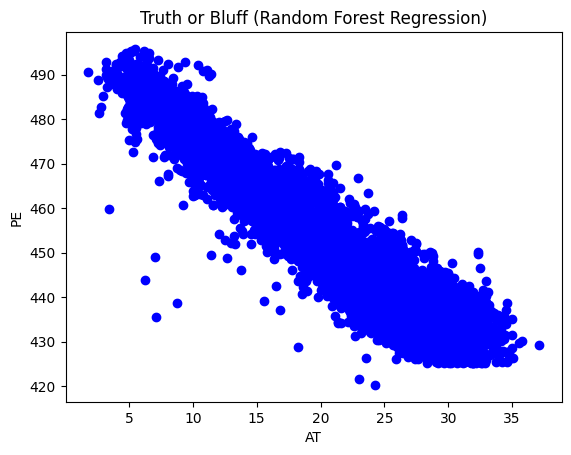

In [ ]:
reshaped_y_train = np.reshape(y_train, (len(X_train), 1))
plt.scatter(X_train[:, 0], reshaped_y_train, color='blue')
#plt.plot(X_train, y_pred_tr, color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend
plt.show()

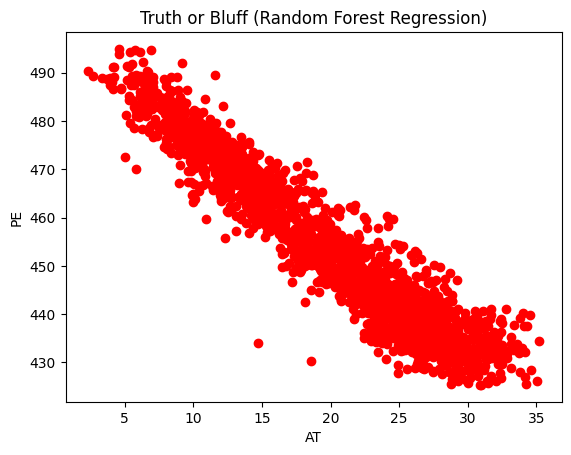

In [ ]:
reshaped_y_test = np.reshape(y_test, (len(X_test), 1))
plt.scatter(X_test[:, 0], reshaped_y_test, color='red')
#plt.plot(X_train, y_pred_tr, color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend
plt.show()